# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [4]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [7]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('/content/housing (1).csv', header=None, delimiter=r"\s+", names=column_names)

In [4]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [8]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [9]:
# Your code here :
from sklearn.model_selection import train_test_split


features = data.drop('MEDV', axis=1)
target = data['MEDV']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2,
                                                    random_state=44)

# Print the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (404, 13) (404,)
Testing set shape: (102, 13) (102,)


## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [10]:
# Your code here :

from sklearn.linear_model import LinearRegression

r_model = LinearRegression()

r_model.fit(X_train, y_train)


y_train_pred = r_model.predict(X_train)
y_test_pred = r_model.predict(X_test)

print("Training predictions:", y_train_pred)
print("Testing predictions:", y_test_pred)

Training predictions: [23.25534537 11.39687062 23.46794271 25.49911865 20.37260016 26.37655347
 19.12346026 17.24498095 34.11345242 23.38906664 34.8014205  31.33527361
 30.71416815 20.33255448 27.78013665 35.07464062  8.05354343 19.30526539
 40.90096762 24.33722558 19.3600286  23.93464472 24.98705968 30.15479085
 23.88633482 17.15690183 23.83032426 22.79149852 19.37682158 26.09910766
 20.55395315 21.37935868 15.91205937 23.61631052 35.67315393 29.37277204
 14.33957554 12.67647043 18.39660631 18.14768608 19.12024124 39.34735541
 23.91348851 27.48518088 28.57401175 23.53607902 37.21641145 26.32407515
 19.5321581  16.89627479 27.70807008 12.55835666 33.51455499 36.72384759
 22.87711738 22.92147649 20.28443204 38.21048527 27.56902853 32.59302515
  5.49469559 15.99029034 36.76563299 17.55688443 22.89087798 20.36354896
 30.58452564 20.76231719 22.4670728  18.48097108 16.53149212 18.89834814
 24.3623402  28.46070667 21.60131844 26.95227441 23.64421763 27.30148467
 17.10741039 26.774451   31.0

## 3. Calculate and print R-squared for both the training and the testing set.

In [11]:
# Your code here :
from sklearn.metrics import r2_score


train_r2 = r2_score(y_train, y_train_pred)

test_r2 = r2_score(y_test, y_test_pred)

# Print the results
print("R-squared (Training):", train_r2)
print("R-squared (Testing):", test_r2)

R-squared (Training): 0.733565792886427
R-squared (Testing): 0.752180080869314


## 4. Calculate and print mean squared error for both the training and the testing set.

In [12]:
# Your code here :from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_squared_error


train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)


print("Mean Squared Error (Training):", train_mse)
print("Mean Squared Error (Testing):", test_mse)

Mean Squared Error (Training): 22.485405536427418
Mean Squared Error (Testing): 20.932750218683722


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [13]:
# Your code here :
from sklearn.metrics import mean_absolute_error

train_mae = mean_absolute_error(y_train, y_train_pred)

test_mae = mean_absolute_error(y_test, y_test_pred)


print("Mean Absolute Error (Training):", train_mae)
print("Mean Absolute Error (Testing):", test_mae)

Mean Absolute Error (Training): 3.33122308357751
Mean Absolute Error (Testing): 3.5072991589283165


## Classification Model Evaluation

In [14]:
from sklearn.datasets import load_iris
data = load_iris()

In [15]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [16]:
column_names = data.feature_names

In [17]:
df = pd.DataFrame(data['data'],columns=column_names)

In [18]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
target = pd.DataFrame(data.target)

In [20]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [21]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [22]:
# Your code here :

from sklearn.model_selection import train_test_split

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

features = df.drop('target', axis=1)
target = df['target']


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)



Training set shape: (120, 4) (120,)
Testing set shape: (30, 4) (30,)


## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [23]:
# Your code here :

from sklearn.linear_model import LogisticRegression


model = LogisticRegression()

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Training predictions:", y_train_pred)
print("Testing predictions:", y_test_pred)

Training predictions: [0 0 1 0 0 2 1 0 0 0 2 1 1 0 0 1 2 2 1 2 1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1
 2 0 1 2 0 2 2 1 1 2 1 0 1 2 0 0 1 2 0 2 0 0 2 1 2 2 2 2 1 0 0 2 2 0 0 0 1
 2 0 2 2 0 1 1 2 1 2 0 2 1 2 1 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2 2 1 2 1
 1 2 2 0 1 2 0 1 2]
Testing predictions: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


## 8. Calculate and print the accuracy score for both the training and the testing set.

In [24]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Accuracy (Training):", train_accuracy)
print("Accuracy (Testing):", test_accuracy)

Accuracy (Training): 0.975
Accuracy (Testing): 1.0


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [25]:
# Your code here :
from sklearn.metrics import balanced_accuracy_score

train_balanced_accuracy = balanced_accuracy_score(y_train, y_train_pred)

test_balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)

print("Balanced Accuracy :", train_balanced_accuracy)
print("Balanced Accuracy :", test_balanced_accuracy)

Balanced Accuracy : 0.975609756097561
Balanced Accuracy : 1.0


## 10. Calculate and print the precision score for both the training and the testing set.

In [26]:
# Your code here :

from sklearn.metrics import precision_score

train_precision = precision_score(y_train, y_train_pred, average='weighted')

test_precision = precision_score(y_test, y_test_pred, average='weighted')

print("Precision (Training):", train_precision)
print("Precision (Testing):", test_precision)

Precision (Training): 0.9767857142857144
Precision (Testing): 1.0


## 11. Calculate and print the recall score for both the training and the testing set.

In [27]:
# Your code here :
from sklearn.metrics import recall_score

train_recall = recall_score(y_train, y_train_pred, average='weighted')

test_recall = recall_score(y_test, y_test_pred, average='weighted')

print("Recall (Training):", train_recall)
print("Recall (Testing):", test_recall)

Recall (Training): 0.975
Recall (Testing): 1.0


## 12. Calculate and print the F1 score for both the training and the testing set.

In [28]:
# Your code here :
from sklearn.metrics import f1_score

train_f1 = f1_score(y_train, y_train_pred, average='weighted')

test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print("F1 Score (Training):", train_f1)
print("F1 Score (Testing):", test_f1)

F1 Score (Training): 0.9749882794186592
F1 Score (Testing): 1.0


## 13. Generate confusion matrices for both the training and the testing set.

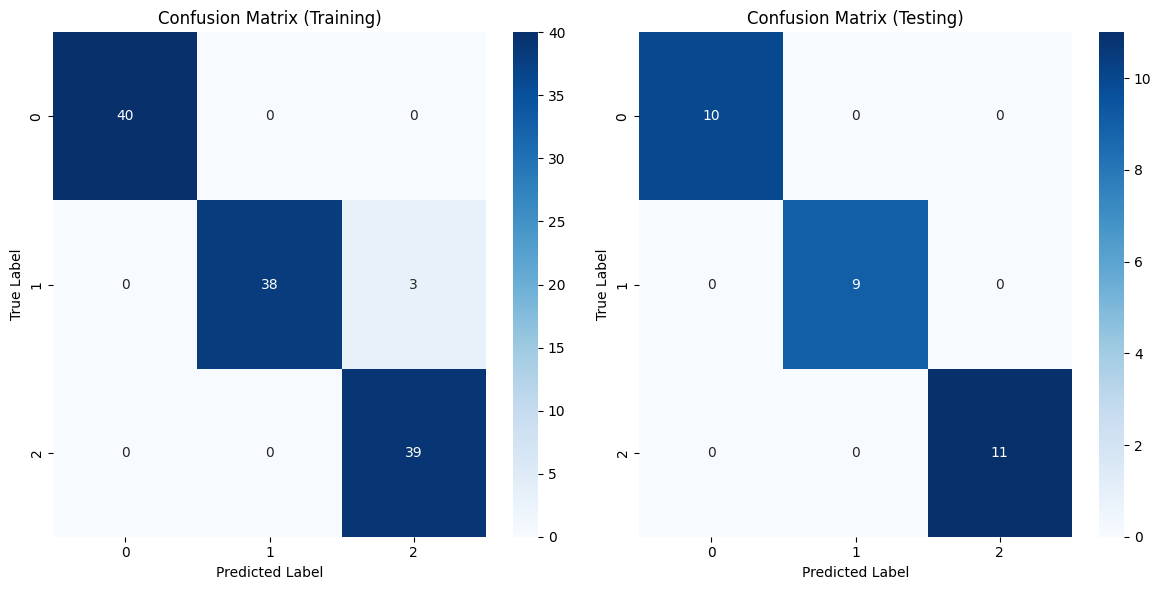

In [34]:
# Your code here :

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Confusion Matrix (Training)")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Confusion Matrix (Testing)")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

plt.tight_layout()
plt.show()


## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [38]:
# Have fun here !
import xgboost as xgb
from sklearn.metrics import accuracy_score


xgb_classifier = xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)


y_train_pred_xgb = xgb_classifier.predict(X_train)
y_test_pred_xgb = xgb_classifier.predict(X_test)


xgb_train_accuracy = accuracy_score(y_train, y_train_pred_xgb)
xgb_test_accuracy = accuracy_score(y_test, y_test_pred_xgb)


print("XGBoost Classifier - Accuracy (Training):", xgb_train_accuracy)
print("XGBoost Classifier - Accuracy (Testing):", xgb_test_accuracy)


XGBoost Classifier - Accuracy (Training): 1.0
XGBoost Classifier - Accuracy (Testing): 1.0
